In [1]:
import pandas as pd 
import bs4 
import urllib

In [2]:
# Define URL
# 'Measuring everything except what makes life worthwhile' by Robert F. Kennedy
url = "https://www.neil.blog/full-speech-transcript/measuring-everything-except-what-makes-life-worthwhile-by-robert-f-kennedy"
raw_html = urllib.request.urlopen(url) 
parsed_html = bs4.BeautifulSoup(raw_html, "lxml")
text = parsed_html.find_all("div", class_ = "entry-content") 
# Speech stored in list 
textl = []
for i in text: 
    textl.append(i.get_text()) 




In [3]:
text

[<div class="entry-content e-content">
 <div class="sqs-layout sqs-grid-12 columns-12" data-layout-label="Post Body" data-type="item" data-updated-on="1623706196976" id="item-60c7c78f17bd4c37e4e22dfb"><div class="row sqs-row"><div class="col sqs-col-12 span-12"><div class="sqs-block html-block sqs-block-html" data-block-type="2" id="block-2776272a5fff9ed7e9c4"><div class="sqs-block-content">
 <p class="" style="white-space:pre-wrap;">Delivered by <a href="https://en.wikipedia.org/wiki/Robert_F._Kennedy">Robert F. Kennedy</a><strong> </strong>at the University of Kansas in 1968<strong> (</strong>Source: <a href="https://www.jfklibrary.org/learn/about-jfk/the-kennedy-family/robert-f-kennedy/robert-f-kennedy-speeches/remarks-at-the-university-of-kansas-march-18-1968">JFK Library</a><strong>) </strong></p>
 </div></div><div class="sqs-block spacer-block sqs-block-spacer sized vsize-1" data-block-type="21" id="block-8e3c3faaae0ef4fd8f5f"><div class="sqs-block-content"> </div></div><div clas

In [4]:
textl

['\n\nDelivered by Robert F. Kennedy at the University of Kansas in 1968 (Source: JFK Library) \n\xa0\nContext:When I went to business school a couple decades ago a professor handed out the most famous paragraph from this speech by Robert Kennedy. The paragraph shredded GDP and included vivid lines like “It counts Whitman\'s rifle and Speck\'s knife, and the television programs which glorify violence in order to sell toys to our children. Yet the gross national product does not allow for the health of our children, the quality of their education or the joy of their play.”I always loved that line, and that larger paragraph, but it was only many years later that I went back to find it and came across the entire speech. It’s a masterpiece. There is so much to learn here about audience connection, shaping a vision, and true servant leadership. You can almost feel the skeptical eyebrows at the beginning and standing ovation at the end. It’s a long speech. Perhaps there\'s way too much on Vi

In [5]:
# Convert to string 
cleantextprep = str(textl);cleantextprep

'[\'\\n\\nDelivered by Robert F. Kennedy at the University of Kansas in 1968 (Source: JFK Library) \\n\\xa0\\nContext:When I went to business school a couple decades ago a professor handed out the most famous paragraph from this speech by Robert Kennedy. The paragraph shredded GDP and included vivid lines like “It counts Whitman\\\'s rifle and Speck\\\'s knife, and the television programs which glorify violence in order to sell toys to our children. Yet the gross national product does not allow for the health of our children, the quality of their education or the joy of their play.”I always loved that line, and that larger paragraph, but it was only many years later that I went back to find it and came across the entire speech. It’s a masterpiece. There is so much to learn here about audience connection, shaping a vision, and true servant leadership. You can almost feel the skeptical eyebrows at the beginning and standing ovation at the end. It’s a long speech. Perhaps there\\\'s way t

In [6]:
import re
# Clean Speech Text 
expression = "[^a-zA-Z0-9 ]" # keep only letters, numbers and whitespace
cleantextCAP = re.sub(expression, "", cleantextprep) # replace empty string 
cleantext = cleantextCAP.lower()
# Create Dictionary 
dat = list(cleantext.split()) 
cleantext[:100]

'nndelivered by robert f kennedy at the university of kansas in 1968 source jfk library nxa0ncontextw'

In [7]:
dat[:10]

['nndelivered',
 'by',
 'robert',
 'f',
 'kennedy',
 'at',
 'the',
 'university',
 'of',
 'kansas']

In [8]:
dict1 = {} 
#i=1
for i in range(len(dat)): 
    #print(i) 
    word = dat[i] 
    dict1[word] = dat.count(word) #count the number of "word" in data "dat"

In [9]:
dict1

{'nndelivered': 1,
 'by': 14,
 'robert': 2,
 'f': 1,
 'kennedy': 7,
 'at': 21,
 'the': 262,
 'university': 3,
 'of': 182,
 'kansas': 8,
 'in': 90,
 '1968': 3,
 'source': 1,
 'jfk': 1,
 'library': 1,
 'nxa0ncontextwhen': 1,
 'i': 107,
 'went': 2,
 'to': 156,
 'business': 1,
 'school': 2,
 'a': 52,
 'couple': 1,
 'decades': 1,
 'ago': 5,
 'professor': 1,
 'handed': 1,
 'out': 10,
 'most': 6,
 'famous': 1,
 'paragraph': 3,
 'from': 11,
 'this': 33,
 'speech': 7,
 'shredded': 1,
 'gdp': 1,
 'and': 178,
 'included': 1,
 'vivid': 1,
 'lines': 1,
 'like': 6,
 'it': 36,
 'counts': 7,
 'whitmans': 2,
 'rifle': 2,
 'specks': 2,
 'knife': 2,
 'television': 2,
 'programs': 2,
 'which': 6,
 'glorify': 2,
 'violence': 2,
 'order': 4,
 'sell': 3,
 'toys': 2,
 'our': 39,
 'children': 9,
 'yet': 2,
 'gross': 6,
 'national': 11,
 'product': 6,
 'does': 4,
 'not': 25,
 'allow': 2,
 'for': 49,
 'health': 2,
 'quality': 2,
 'their': 28,
 'education': 2,
 'or': 13,
 'joy': 3,
 'playi': 1,
 'always': 2,
 'lo

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Unsorted speech constituents in dictionary as dict1 
keys = list(dict1) 
filtered_words = [word for word in keys if word not in stopwords.words('english')] 
dict2 = dict((k, dict1[k]) for k in filtered_words if k in filtered_words)

print(len(dict2))
dict2

921


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/youcefnazimtahari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'nndelivered': 1,
 'robert': 2,
 'f': 1,
 'kennedy': 7,
 'university': 3,
 'kansas': 8,
 '1968': 3,
 'source': 1,
 'jfk': 1,
 'library': 1,
 'nxa0ncontextwhen': 1,
 'went': 2,
 'business': 1,
 'school': 2,
 'couple': 1,
 'decades': 1,
 'ago': 5,
 'professor': 1,
 'handed': 1,
 'famous': 1,
 'paragraph': 3,
 'speech': 7,
 'shredded': 1,
 'gdp': 1,
 'included': 1,
 'vivid': 1,
 'lines': 1,
 'like': 6,
 'counts': 7,
 'whitmans': 2,
 'rifle': 2,
 'specks': 2,
 'knife': 2,
 'television': 2,
 'programs': 2,
 'glorify': 2,
 'violence': 2,
 'order': 4,
 'sell': 3,
 'toys': 2,
 'children': 9,
 'yet': 2,
 'gross': 6,
 'national': 11,
 'product': 6,
 'allow': 2,
 'health': 2,
 'quality': 2,
 'education': 2,
 'joy': 3,
 'playi': 1,
 'always': 2,
 'loved': 1,
 'line': 1,
 'larger': 1,
 'many': 4,
 'years': 10,
 'later': 2,
 'back': 3,
 'find': 2,
 'came': 2,
 'across': 3,
 'entire': 1,
 'masterpiece': 1,
 'much': 9,
 'learn': 1,
 'audience': 2,
 'connection': 1,
 'shaping': 1,
 'vision': 2,
 'true

In [11]:
# Finding word sequences in a dictionary ordered by frequency 
def SequenceSelection(dictionary, length, startindex = 0):
 
 # Check Input 
    if length > len(dictionary): 
        return print("input length is too long"); 
    else: 
        d = dictionary 
        items = [(v, k) for k, v in d.items()] 
        items.sort() 
        items.reverse() 
        itemsOut = [(k, v) for v, k in items] 

        highest = itemsOut[startindex:startindex + length] 
        dd = dict(highest) 
        wanted_keys = dd.keys() 
        dictshow = dict((k, d[k]) for k in wanted_keys if k in d) 
        return dictshow 
 
dictshow = SequenceSelection(dictionary = dict2, length = 7, startindex = 0)

In [12]:
dictshow

{'think': 46,
 'united': 43,
 'states': 43,
 'going': 26,
 'dont': 25,
 'vietnam': 23,
 'want': 21}

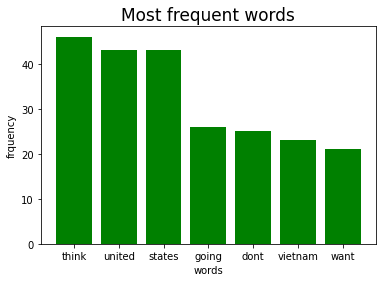

In [13]:
import matplotlib.pyplot as plt
dictionary = dictshow
plt.bar((dictionary.keys()), dictionary.values(), color='g')
plt.ylabel("frquency")          
plt.xlabel("words")           
plt.title("Most frequent words", {'fontsize' : 17})
plt.savefig("Most frequent words.png", transparent=True)
plt.show()

In [14]:
! pip install pysent3

In [15]:
#import pysentiment as ps #<<-- seems like "pysentiment" package doesn't work anymore?
import pysent3 as ps

In [16]:
hiv4 = ps.HIV4() # Use Harvard IV
tokens = hiv4.tokenize(cleantext) # split string into constituents
score = hiv4.get_score(tokens) 
print(score)

{'Positive': 326, 'Negative': 252, 'Polarity': 0.12802768143939847, 'Subjectivity': 0.13580827064478188}
